In [2]:
#Week 04 Assignment
#To continue with census tract data, I want to focus on the race in Kern County. It is important
#to look at who is most impacted by oil wells and the health imapcts and exposure that might be
#affecting a community more densely 

In [3]:
#First let's import some libraries

In [4]:
import pandas as pd
import geopandas as gpd
import json
# to give more power to figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [5]:
# Next I will import census tract data from social explorer focusing on race as a variable in Kern

In [6]:
race_kern = pd.read_csv('R13296777_SL140.csv')

In [7]:
race_kern.shape

(236, 74)

In [8]:
race_kern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    int64  
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    int64  
 12  Geo_COUNTY         236 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [9]:
race_kern.head(5)

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  6029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  6029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  6029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  6029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  6029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          3903     NaN         NaN   
1         ca         140            0          3904     NaN         NaN   
2         ca         140            0          3905     NaN         NaN   
3         ca         140            0          3906     NaN         NaN   
4         ca         140            0          3907     NaN         NaN   

   Geo_DIVISION  ...  SE_B04001_010  PCT_SE_B04001_002  PCT_SE_B04001_003  \
0           NaN  ...            575              80.63              78.61   
1           NaN  ...           1100              78.92              70.49   
2           NaN  ...             62              95.00              67.12   
3           NaN  ...           1321              66.80              65.67   
4           NaN  ...           1051              57.38              39.58   

   PCT_SE_B04001_004  PCT_SE_B04001_005  PCT_SE_B04001_006  PCT_SE_B04001_007  \
0               0.00               0.00               0.00               0.77   
1               0.00               0.57               4.35               0.00   
2               0.00               0.00              27.88               0.00   
3               0.03               0.00               0.48               0.00   
4              10.54               5.23               0.00               0.00   

   PCT_SE_B04001_008  PCT_SE_B04001_009  PCT_SE_B04001_010  
0               0.00               1.25              19.37  
1               2.97               0.54              21.08  
2               0.00               0.00               5.00  
3               0.00               0.63              33.20  
4               0.00               2.03              42.62  

[5 rows x 74 columns]

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
race_kern.sample()

Geo_FIPS                                    Geo_QName Geo_FILEID  \
171  6029004603  Census Tract 46.03, Kern County, California      ACSSF   

    Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
171         ca         140            0          4074     NaN         NaN   

     Geo_DIVISION  Geo_STATECE  Geo_STATE  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
171           NaN          NaN          6          29         NaN        NaN   

     Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
171       4603         NaN         NaN         NaN           NaN          NaN   

     Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
171         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

     Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
171       NaN        NaN         NaN           NaN     NaN       NaN   

     Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  \
171         NaN       NaN       NaN      NaN        NaN        NaN   

     Geo_SUBMCD  Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  \
171         NaN        NaN        NaN        NaN     NaN      NaN      NaN   

     Geo_UGA  Geo_PUMA5  Geo_PUMA1           Geo_GEOID            Geo_NAME  \
171      NaN        NaN        NaN  14000US06029004603  Census Tract 46.03   

     Geo_BTTR  Geo_BTBG  Geo_PLACESE  SE_B04001_001  SE_B04001_002  \
171       NaN       NaN          NaN           3174           1342   

     SE_B04001_003  SE_B04001_004  SE_B04001_005  SE_B04001_006  \
171            393            750             29             48   

     SE_B04001_007  SE_B04001_008  SE_B04001_009  SE_B04001_010  \
171              6              0            116           1832   

     PCT_SE_B04001_002  PCT_SE_B04001_003  PCT_SE_B04001_004  \
171              42.28              12.38              23.63   

     PCT_SE_B04001_005  PCT_SE_B04001_006  PCT_SE_B04001_007  \
171               0.91               1.51               0.19   

     PCT_SE_B04001_008  PCT_SE_B04001_009  PCT_SE_B04001_010  
171                0.0               3.65              57.72

In [12]:
#So many columns, and null rows 

In [13]:
race_kern.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    int64  
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          236 non-null    int64  
 12  Geo_COUNTY         236 non-null    int64  
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          236 non-null    int64  
 16  Geo_BLKGRP         0 non-n

In [14]:
race_kern.Geo_FIPS.head()

0    6029000102
1    6029000103
2    6029000104
3    6029000105
4    6029000106
Name: Geo_FIPS, dtype: int64

In [15]:
race_kern.Geo_STATE.head()

0    6
1    6
2    6
3    6
4    6
Name: Geo_STATE, dtype: int64

In [16]:
race_kern.Geo_COUNTY.head()

0    29
1    29
2    29
3    29
4    29
Name: Geo_COUNTY, dtype: int64

In [17]:
race_kern.Geo_QName.head()

0    Census Tract 1.02, Kern County, California
1    Census Tract 1.03, Kern County, California
2    Census Tract 1.04, Kern County, California
3    Census Tract 1.05, Kern County, California
4    Census Tract 1.06, Kern County, California
Name: Geo_QName, dtype: object

In [18]:
race_kern.Geo_FILEID.head()

0    ACSSF
1    ACSSF
2    ACSSF
3    ACSSF
4    ACSSF
Name: Geo_FILEID, dtype: object

In [19]:
race_kern = pd.read_csv(
    'R13296777_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [20]:
race_kern.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  06029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  06029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  06029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  06029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  06029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  Geo_REGION  \
0         ca         140            0          3903     NaN         NaN   
1         ca         140            0          3904     NaN         NaN   
2         ca         140            0          3905     NaN         NaN   
3         ca         140            0          3906     NaN         NaN   
4         ca         140            0          3907     NaN         NaN   

   Geo_DIVISION  Geo_STATECE Geo_STATE Geo_COUNTY  Geo_COUSUB  Geo_PLACE  \
0           NaN          NaN        06        029         NaN        NaN   
1           NaN          NaN        06        029         NaN        NaN   
2           NaN          NaN        06        029         NaN        NaN   
3           NaN          NaN        06        029         NaN        NaN   
4           NaN          NaN        06        029         NaN        NaN   

   Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  \
0        102         NaN         NaN         NaN           NaN          NaN   
1        103         NaN         NaN         NaN           NaN          NaN   
2        104         NaN         NaN         NaN           NaN          NaN   
3        105         NaN         NaN         NaN           NaN          NaN   
4        106         NaN         NaN         NaN           NaN          NaN   

   Geo_AITSCE  Geo_AITS  Geo_ANRC  Geo_CBSA  Geo_CSA  Geo_METDIV  Geo_MACC  \
0         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
1         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
2         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
3         NaN       NaN       NaN       NaN      NaN         NaN       NaN   
4         NaN       NaN       NaN       NaN      NaN         NaN       NaN   

   Geo_MEMI  Geo_NECTA  Geo_CNECTA  Geo_NECTADIV  Geo_UA  Geo_UACP  \
0       NaN        NaN         NaN           NaN     NaN       NaN   
1       NaN        NaN         NaN           NaN     NaN       NaN   
2       NaN        NaN         NaN           NaN     NaN       NaN   
3       NaN        NaN         NaN           NaN     NaN       NaN   
4       NaN        NaN         NaN           NaN     NaN       NaN   

   Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_VTD  Geo_ZCTA3  Geo_ZCTA5  Geo_SUBMCD  \
0         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
1         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
2         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
3         NaN       NaN       NaN      NaN        NaN        NaN         NaN   
4         NaN       NaN       NaN      NaN        NaN        NaN         NaN   

   Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_TAZ  Geo_UGA  \
0        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
1        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
2        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
3        NaN        NaN        NaN     NaN      NaN      NaN      NaN   
4        NaN        NaN        NaN     NaN      NaN      NaN      NaN   

   Geo_PUMA5  Geo_PUMA1           Geo_GEOID           Geo_NAME  Geo_BTTR  \
0        NaN        NaN  14000US06029000102  Census Tract 1.02       NaN   
1        NaN        NaN  14000US06029000103  Census Tract 1.03       NaN   
2        NaN        NaN  14000US06029000104  Census Tract 1.04       NaN   
3        NaN        NaN  14000US06029000105  Census Tract 1.05       N

In [21]:
race_kern.columns[race_kern.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [22]:
race_kern = race_kern.dropna(axis=1,how="all")

In [23]:
race_kern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           236 non-null    object 
 1   Geo_QName          236 non-null    object 
 2   Geo_FILEID         236 non-null    object 
 3   Geo_STUSAB         236 non-null    object 
 4   Geo_SUMLEV         236 non-null    int64  
 5   Geo_GEOCOMP        236 non-null    int64  
 6   Geo_LOGRECNO       236 non-null    int64  
 7   Geo_STATE          236 non-null    object 
 8   Geo_COUNTY         236 non-null    object 
 9   Geo_TRACT          236 non-null    int64  
 10  Geo_GEOID          236 non-null    object 
 11  Geo_NAME           236 non-null    object 
 12  SE_B04001_001      236 non-null    int64  
 13  SE_B04001_002      236 non-null    int64  
 14  SE_B04001_003      236 non-null    int64  
 15  SE_B04001_004      236 non-null    int64  
 16  SE_B04001_005      236 non

In [24]:
race_kern.head()

Geo_FIPS                                   Geo_QName Geo_FILEID  \
0  06029000102  Census Tract 1.02, Kern County, California      ACSSF   
1  06029000103  Census Tract 1.03, Kern County, California      ACSSF   
2  06029000104  Census Tract 1.04, Kern County, California      ACSSF   
3  06029000105  Census Tract 1.05, Kern County, California      ACSSF   
4  06029000106  Census Tract 1.06, Kern County, California      ACSSF   

  Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO Geo_STATE Geo_COUNTY  \
0         ca         140            0          3903        06        029   
1         ca         140            0          3904        06        029   
2         ca         140            0          3905        06        029   
3         ca         140            0          3906        06        029   
4         ca         140            0          3907        06        029   

   Geo_TRACT           Geo_GEOID           Geo_NAME  SE_B04001_001  \
0        102  14000US06029000102  Census Tract 1.02           2968   
1        103  14000US06029000103  Census Tract 1.03           5218   
2        104  14000US06029000104  Census Tract 1.04           1241   
3        105  14000US06029000105  Census Tract 1.05           3979   
4        106  14000US06029000106  Census Tract 1.06           2466   

   SE_B04001_002  SE_B04001_003  SE_B04001_004  SE_B04001_005  SE_B04001_006  \
0           2393           2333              0              0              0   
1           4118           3678              0             30            227   
2           1179            833              0              0            346   
3           2658           2613              1              0             19   
4           1415            976            260            129              0   

   SE_B04001_007  SE_B04001_008  SE_B04001_009  SE_B04001_010  \
0             23              0             37            575   
1              0            155             28           1100   
2              0              0              0             62   
3              0              0             25           1321   
4              0              0             50           1051   

   PCT_SE_B04001_002  PCT_SE_B04001_003  PCT_SE_B04001_004  PCT_SE_B04001_005  \
0              80.63              78.61               0.00               0.00   
1              78.92              70.49               0.00               0.57   
2              95.00              67.12               0.00               0.00   
3              66.80              65.67               0.03               0.00   
4              57.38              39.58              10.54               5.23   

   PCT_SE_B04001_006  PCT_SE_B04001_007  PCT_SE_B04001_008  PCT_SE_B04001_009  \
0               0.00               0.77               0.00               1.25   
1               4.35               0.00               2.97               0.54   
2              27.88               0.00               0.00               0.00   
3               0.48               0.00               0.00               0.63   
4               0.00               0.00               0.00               2.03   

   PCT_SE_B04001_010  
0              19.37  
1              21.08  
2               5.00  
3              33.20  
4              42.62

In [25]:
columns_to_keep = ['Geo_FIPS',
                   'SE_B04001_001',
                   'SE_B04001_002',
                   'SE_B04001_003',
                   'SE_B04001_004',
                   'SE_B04001_005',
                   'SE_B04001_006',
                   'SE_B04001_007',
                   'SE_B04001_008',
                   'SE_B04001_009',
                   'SE_B04001_010',]

In [26]:
race_kern2 = race_kern[columns_to_keep]

In [27]:
columns = list(race_kern2) 
columns

['Geo_FIPS',
 'SE_B04001_001',
 'SE_B04001_002',
 'SE_B04001_003',
 'SE_B04001_004',
 'SE_B04001_005',
 'SE_B04001_006',
 'SE_B04001_007',
 'SE_B04001_008',
 'SE_B04001_009',
 'SE_B04001_010']

In [28]:
race_kern2.columns = ['FIPS',
'TotalPop',
'Not Hispanic or Latino',
'White Alone',
'Black or African American Alone',
'American Indian and Alaska Native Alone',
'Asian Alone',
'Native Hawaiian and Other Pacific Islander Alone',
'Some Other Race Alone',
'Two or More Races',
'Hispanic or Latino']

In [29]:
race_kern2.sample(5)

FIPS  TotalPop  Not Hispanic or Latino  White Alone  \
162  06029004302      5469                    2349          798   
130  06029003304      2559                    1520         1348   
202  06029005509      4335                    3577         2836   
95   06029003103      4053                     765          617   
157  06029003900      3230                    1212          864   

     Black or African American Alone  American Indian and Alaska Native Alone  \
162                             1156                                       78   
130                               76                                        3   
202                              225                                        0   
95                               133                                        0   
157                              250                                       15   

     Asian Alone  Native Hawaiian and Other Pacific Islander Alone  \
162           67                                                30   
130           15                                                 9   
202          129                                                 0   
95             0                                                 0   
157           44                                                 0   

     Some Other Race Alone  Two or More Races  Hispanic or Latino  
162                      3                217                3120  
130                      0                 69                1039  
202                     41                346                 758  
95                       0                 15                3288  
157                      0                 39                2018

In [30]:
race_kern2['TotalPop'].head()

0    2968
1    5218
2    1241
3    3979
4    2466
Name: TotalPop, dtype: int64

<AxesSubplot: ylabel='Frequency'>

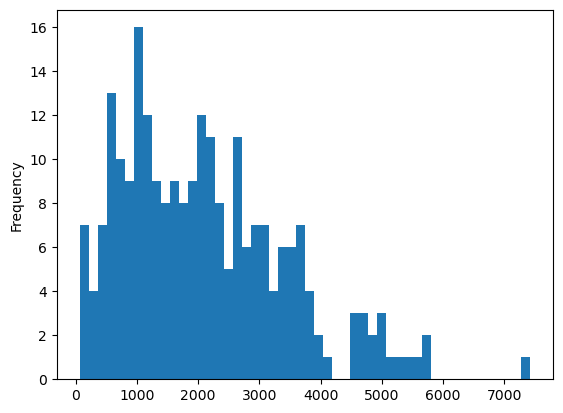

In [31]:
race_kern2['Hispanic or Latino'].plot.hist(bins=50)

<AxesSubplot: xlabel='Hispanic or Latino', ylabel='White Alone'>

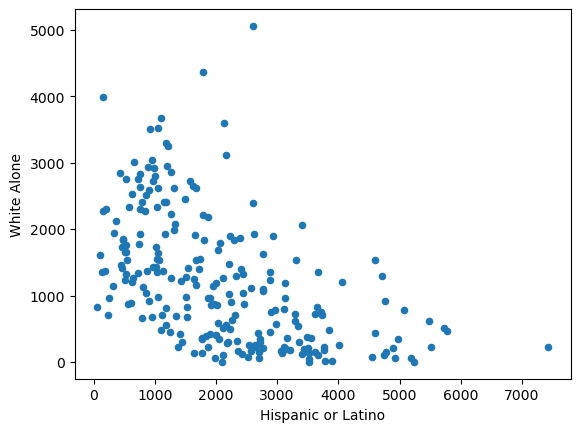

In [32]:
race_kern2.plot.scatter(x='Hispanic or Latino',y='White Alone')

In [33]:
race_kern_sorted = race_kern2.sort_values(by='Hispanic or Latino',ascending = False)

In [34]:
race_kern_sorted[['FIPS','Hispanic or Latino']].head(10)

FIPS  Hispanic or Latino
226  06029006202                7429
230  06029006403                5774
37   06029001101                5722
179  06029004802                5519
114  06029003208                5489
174  06029004607                5237
228  06029006303                5180
177  06029004704                5067
100  06029003126                4975
180  06029004901                4927

<AxesSubplot: xlabel='FIPS'>

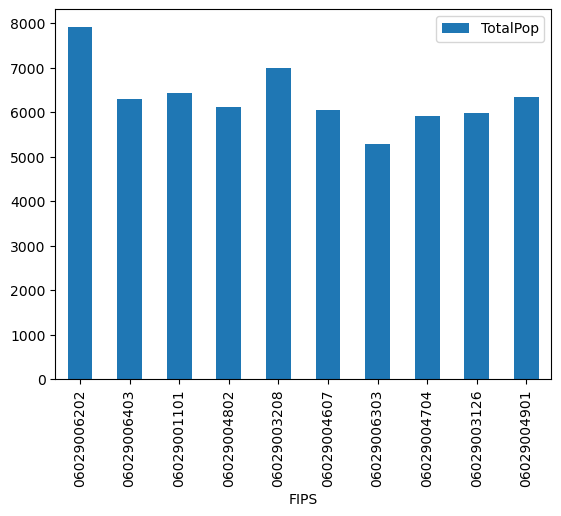

In [35]:
race_kern_sorted.head(10).plot.bar(x='FIPS',
                            y='TotalPop')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Latino Population in Kern County in 2020'}, ylabel='FIPS'>

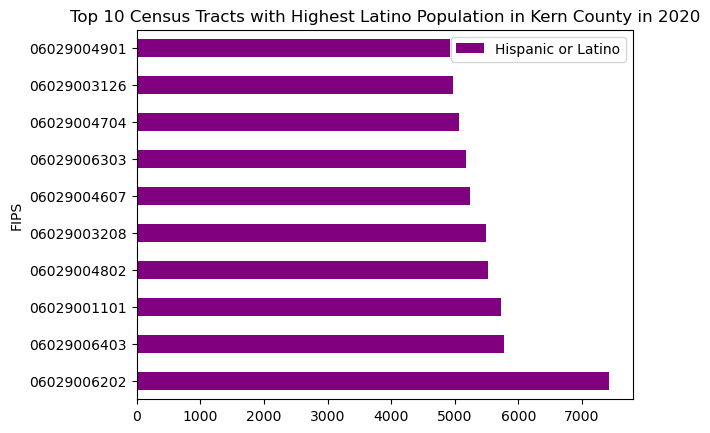

In [36]:
race_kern_sorted.head(10).plot.barh(x='FIPS',
                            y='Hispanic or Latino', 
                            title='Top 10 Census Tracts with Highest Latino Population in Kern County in 2020',
                            color='purple')

In [37]:
race_kern2[race_kern2['Hispanic or Latino']==0]

Empty DataFrame
Columns: [FIPS, TotalPop, Not Hispanic or Latino, White Alone, Black or African American Alone, American Indian and Alaska Native Alone, Asian Alone, Native Hawaiian and Other Pacific Islander Alone, Some Other Race Alone, Two or More Races, Hispanic or Latino]
Index: []

In [38]:
tracts=gpd.read_file('acs2021_5yr_B99021_14000US06029003305.geojson')
tracts.head()

geoid                         name  B99021001  \
0        05000US06029              Kern County, CA   905644.0   
1  14000US06029000102  Census Tract 1.02, Kern, CA     2968.0   
2  14000US06029000103  Census Tract 1.03, Kern, CA     5218.0   
3  14000US06029000104  Census Tract 1.04, Kern, CA     1241.0   
4  14000US06029000105  Census Tract 1.05, Kern, CA     3979.0   

   B99021001, Error  B99021002  B99021002, Error  B99021003  B99021003, Error  \
0              -1.0    17813.0              -1.0   887831.0              -1.0   
1              -1.0        9.0              -1.0     2959.0              -1.0   
2              -1.0       19.0              -1.0     5199.0              -1.0   
3              -1.0       12.0              -1.0     1229.0              -1.0   
4              -1.0      268.0              -1.0     3711.0              -1.0   

                                            geometry  
0  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...  
1  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...  
2  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...  
3  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...  
4  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...

<AxesSubplot: >

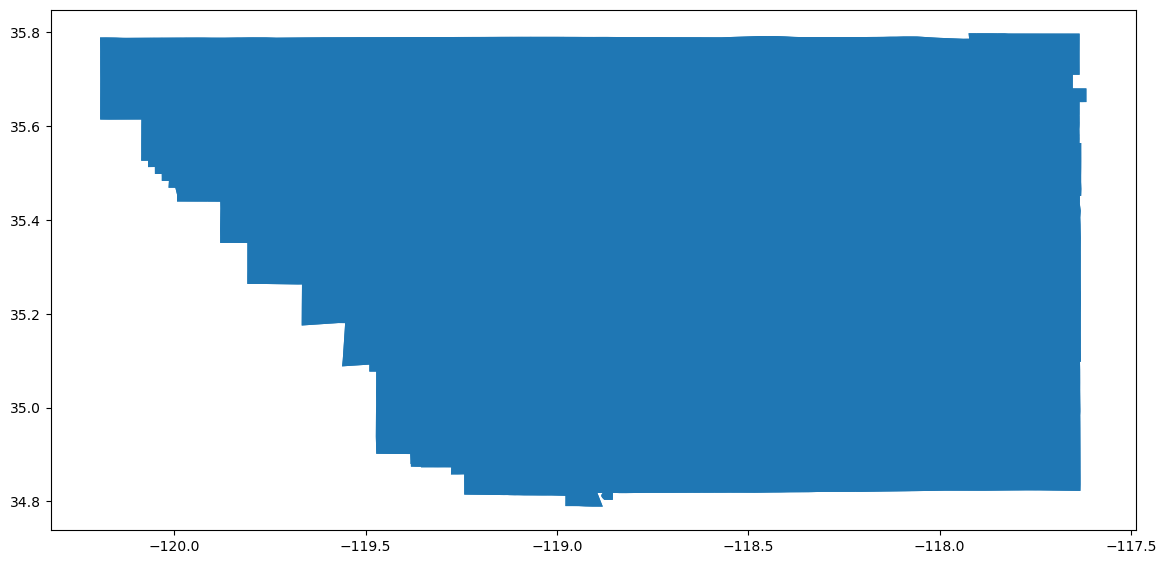

In [39]:
tracts.plot(figsize=(14,12))

In [40]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             237 non-null    object  
 1   name              237 non-null    object  
 2   B99021001         237 non-null    float64 
 3   B99021001, Error  237 non-null    float64 
 4   B99021002         237 non-null    float64 
 5   B99021002, Error  237 non-null    float64 
 6   B99021003         237 non-null    float64 
 7   B99021003, Error  237 non-null    float64 
 8   geometry          237 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 16.8+ KB


In [41]:
tracts = tracts[['geoid','geometry']]
tracts.head()

geoid                                           geometry
0        05000US06029  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...
1  14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...
2  14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...
3  14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...
4  14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...

In [42]:
tracts['FIPS'] = tracts['geoid'].str[-11:]

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [43]:
tracts.head()

geoid                                           geometry  \
0        05000US06029  MULTIPOLYGON (((-119.91366 35.43926, -119.9232...   
1  14000US06029000102  MULTIPOLYGON (((-119.02148 35.43994, -119.0202...   
2  14000US06029000103  MULTIPOLYGON (((-119.03902 35.42290, -119.0389...   
3  14000US06029000104  MULTIPOLYGON (((-119.03879 35.44175, -119.0387...   
4  14000US06029000105  MULTIPOLYGON (((-119.03904 35.43414, -119.0365...   

          FIPS  
0  5000US06029  
1  06029000102  
2  06029000103  
3  06029000104  
4  06029000105

In [44]:
tracts_race=tracts.merge(race_kern2,on="FIPS")

<AxesSubplot: >

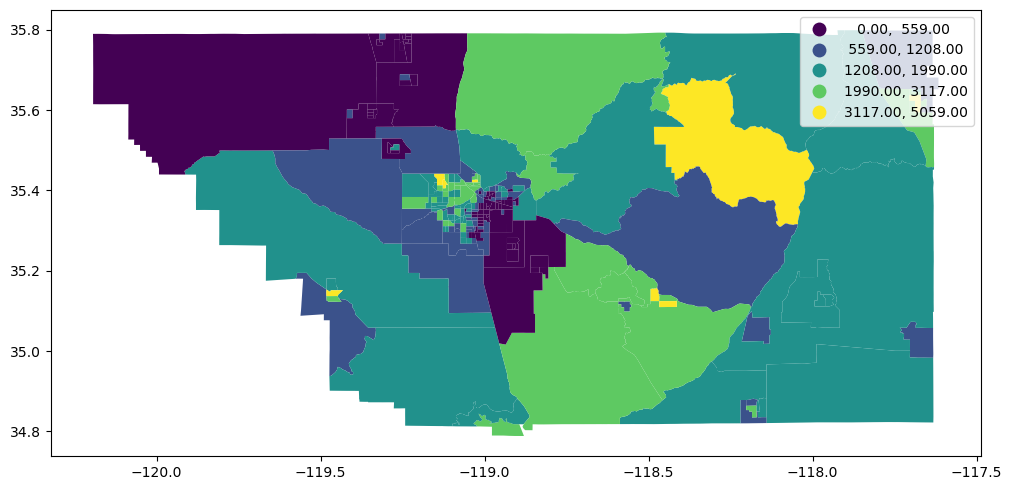

In [45]:
tracts_race.plot(figsize=(12,10),
                 column='White Alone',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

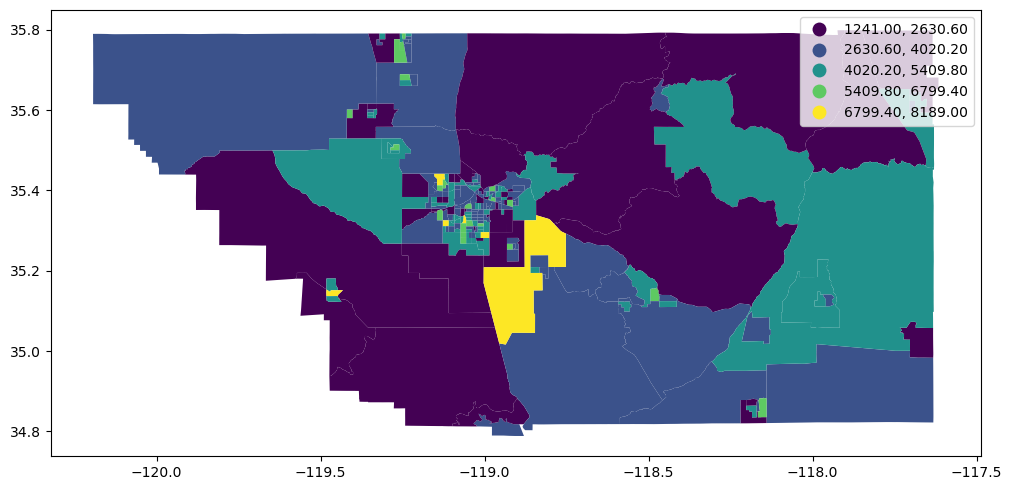

In [46]:
tracts_race.plot(figsize=(12,10),
                 column='TotalPop',
                 legend=True, 
                 scheme='equal_interval')

In [47]:
import folium

In [53]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_race, # geo data
                  data=race_kern2, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS','Hispanic or Latino','White Alone','Black or African American Alone',
                           ], # [key, value]
                  fill_color='YlGnBu',
                  line_weight=0.1, 
                  fill_opacity=0.7,
                  line_opacity=0.4, # line opacity (of the border)
                  legend_name='Race in Kern County (2020)').add_to(m)    # name on the legend color bar
m

In [60]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Race - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="folium.Choropleth(
                  geo_data=tracts_race, # geo data
                  data=race_kern2, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS','Hispanic or Latino','White Alone','Black or African American Alone',
                           ], # [key, value]
                  fill_color='YlGnBu'"></script>
 
  
  <script>
  $( function() {
    $( "#maplegend" ).Kern County({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>(Race in Kern 2020 by Census Tract)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:darkblue;opacity:0.7;'></span>Hispanic or Latino</li>
    <li><span style='background:lightyellow;opacity:0.7;'></span>White Alone</li>
    <li><span style='background:lightgreen;opacity:0.7;'></span>African American or Black Alone</li>
    <li><span style='background:lightblue;opacity:0.7;'></span>Asian Alone</li>
    <li><span style='background:teal;opacity:0.7;'></span>Native Hawaiian and Other Pacific Islander Alone</li>
    <li><span style='background:lightteal;opacity:0.7;'></span>Some Other Race Alone</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m

In [ ]:
#Amazing, I want to be able to create an interactive map that truly shows the difference racial
#groups in different areas. I think it's important and should also be overlayed over wells data